# **PROYECTO FINAL MACHINE LEARNING - OSCAR RIVERA**








# **REGRESIÓN:**

---


Para este proyecto, realizaremos un modelo de regresión con el objetivo de predecir el costo de un auto usado en base a ciertas características. Nos apoyaremos de un dataset obtenido de www.kaggle.com llamado "Vehicle Dataset". Comencemos importando las librerías que utilizaremos.


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn. ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import pickle

Posteriormente cargaremos nuestro archivo .csv y lo visualizaremos como un dataframe con ayuda de pandas.

In [ ]:
car_df = pd.read_csv('car data.csv')

Cargamos las primeros 10 filas de datos para visualizar de que manera está estructurado nuestro dataframe.

In [ ]:
car_df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350,5590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4750,9540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7250,9850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2850,4150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4600,6870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9250,9830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6750,8120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6500,8610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8750,8890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7450,8920,42367,Diesel,Dealer,Manual,0


Continuamos analizando nuestro dataframe para ver cuántas columnas y filas hay, de la misma manera que tipo de datos contienen cada columna y si hay evidencia de la ausencia de datos por cada una.

Una vez analizado, comenzamos con el apartado de preprocesamiento para preparar nuestros datos para poder servir a nuestro modelo de entrenamiento.

In [ ]:
#Vemos una descripción estadística de nuestro dataframe para comenzar a ver de qué manera comenzar nuestro preprocesamiento.
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980,0.043189
std,2.891554,5082.811556,8644.115402,38886.883882,0.247915
min,2003.000000,100.000000,320.000000,500.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000
max,2018.000000,35000.000000,92600.000000,500000.000000,3.000000


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int64 
 3   Present_Price  301 non-null    int64 
 4   Kms_Driven     301 non-null    int64 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.3+ KB


### **PREPROCESAMIENTO:**

In [ ]:
#Comenzamos quitando la columna Car_Name puesto que no nos ofrece una ayuda para nuestro modelo (tampoco nos da la marca del auto)
car_df = car_df.drop('Car_Name', axis=1)

In [ ]:
#Verificamos nuevamente que nuestro dataset no tenga evidencia de datos faltantes (lo hicimos con el comando .info tambien)
pd.isnull(car_df).sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Al no haber datos faltantes, no hay necesidad de imputación.

In [ ]:
#Vamos a crear una columna que nos diga los años de antiguedad del auto y cambiarla en lugar del año del auto
car_df['Current_year'] = datetime.now().year
car_df['No_years'] = car_df['Current_year'] - car_df['Year']
car_df.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_years
0,2014,3350,5590,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4750,9540,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7250,9850,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2850,4150,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4600,6870,42450,Diesel,Dealer,Manual,0,2024,10
5,2018,9250,9830,2071,Diesel,Dealer,Manual,0,2024,6
6,2015,6750,8120,18796,Petrol,Dealer,Manual,0,2024,9
7,2015,6500,8610,33429,Diesel,Dealer,Manual,0,2024,9
8,2016,8750,8890,20273,Diesel,Dealer,Manual,0,2024,8
9,2015,7450,8920,42367,Diesel,Dealer,Manual,0,2024,9


In [ ]:
#y quitamos ambas columnas (Year y Current_year) porque ya no nos interesan
car_df = car_df.drop('Year', axis=1)
car_df = car_df.drop('Current_year', axis=1)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,3350,5590,27000,Petrol,Dealer,Manual,0,10
1,4750,9540,43000,Diesel,Dealer,Manual,0,11
2,7250,9850,6900,Petrol,Dealer,Manual,0,7
3,2850,4150,5200,Petrol,Dealer,Manual,0,13
4,4600,6870,42450,Diesel,Dealer,Manual,0,10


<ipython-input-11-e570d649ccbd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type', data=car_df, palette='Set1')


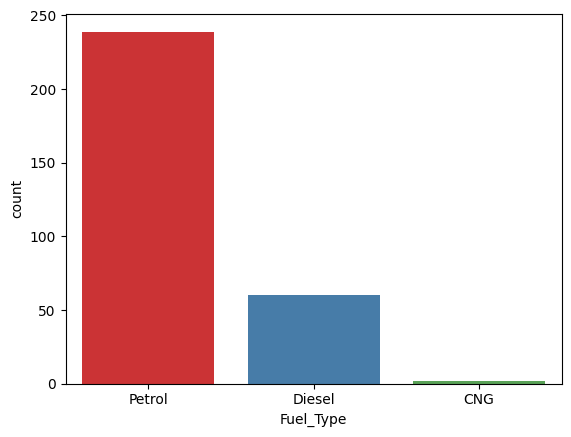

In [ ]:
sns.countplot(x='Fuel_Type', data=car_df, palette='Set1')
plt.show()

<ipython-input-12-a0b4edc8135f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=car_df, palette='Set1')


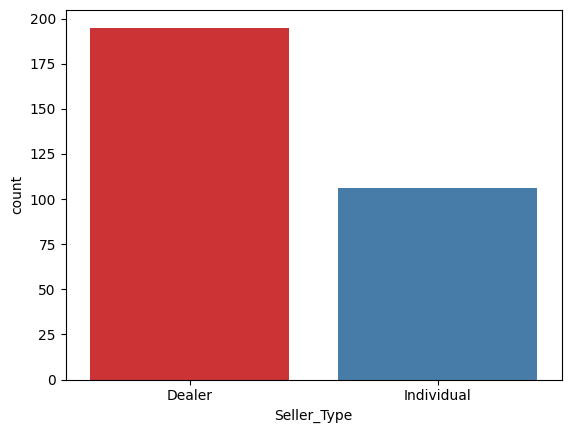

In [ ]:
sns.countplot(x='Seller_Type', data=car_df, palette='Set1')
plt.show()

<ipython-input-13-9cc781a44dd6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=car_df, palette='Set1')


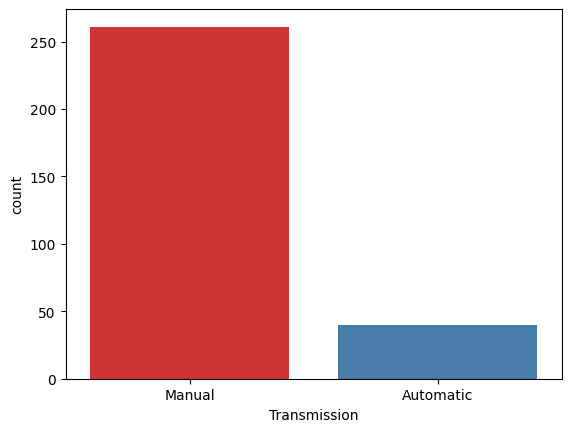

In [ ]:
sns.countplot(x='Transmission', data=car_df, palette='Set1')
plt.show()

<ipython-input-14-855081314903>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Owner', data=car_df, palette='Set1')


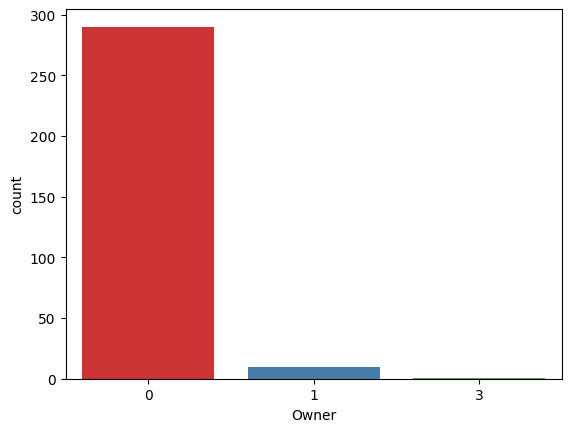

In [ ]:
sns.countplot(x='Owner', data=car_df, palette='Set1')
plt.show()

In [ ]:
#Cambiamos nuestras variables de tipo categóricas usando One-Hot Encoding
#Utilizamos One-Hot Encoding y no Label-Encoding ya que en esas variables categóricas no hay un orden inherente
cat_columns = ['Fuel_Type','Seller_Type', 'Transmission']
car_df = pd.get_dummies(car_df, columns=cat_columns, dtype=int)

#df = pd.get_dummies(df, drop_first=True)
car_df.head(20)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3350,5590,27000,0,10,0,0,1,1,0,0,1
1,4750,9540,43000,0,11,0,1,0,1,0,0,1
2,7250,9850,6900,0,7,0,0,1,1,0,0,1
3,2850,4150,5200,0,13,0,0,1,1,0,0,1
4,4600,6870,42450,0,10,0,1,0,1,0,0,1
5,9250,9830,2071,0,6,0,1,0,1,0,0,1
6,6750,8120,18796,0,9,0,0,1,1,0,0,1
7,6500,8610,33429,0,9,0,1,0,1,0,0,1
8,8750,8890,20273,0,8,0,1,0,1,0,0,1
9,7450,8920,42367,0,9,0,1,0,1,0,0,1


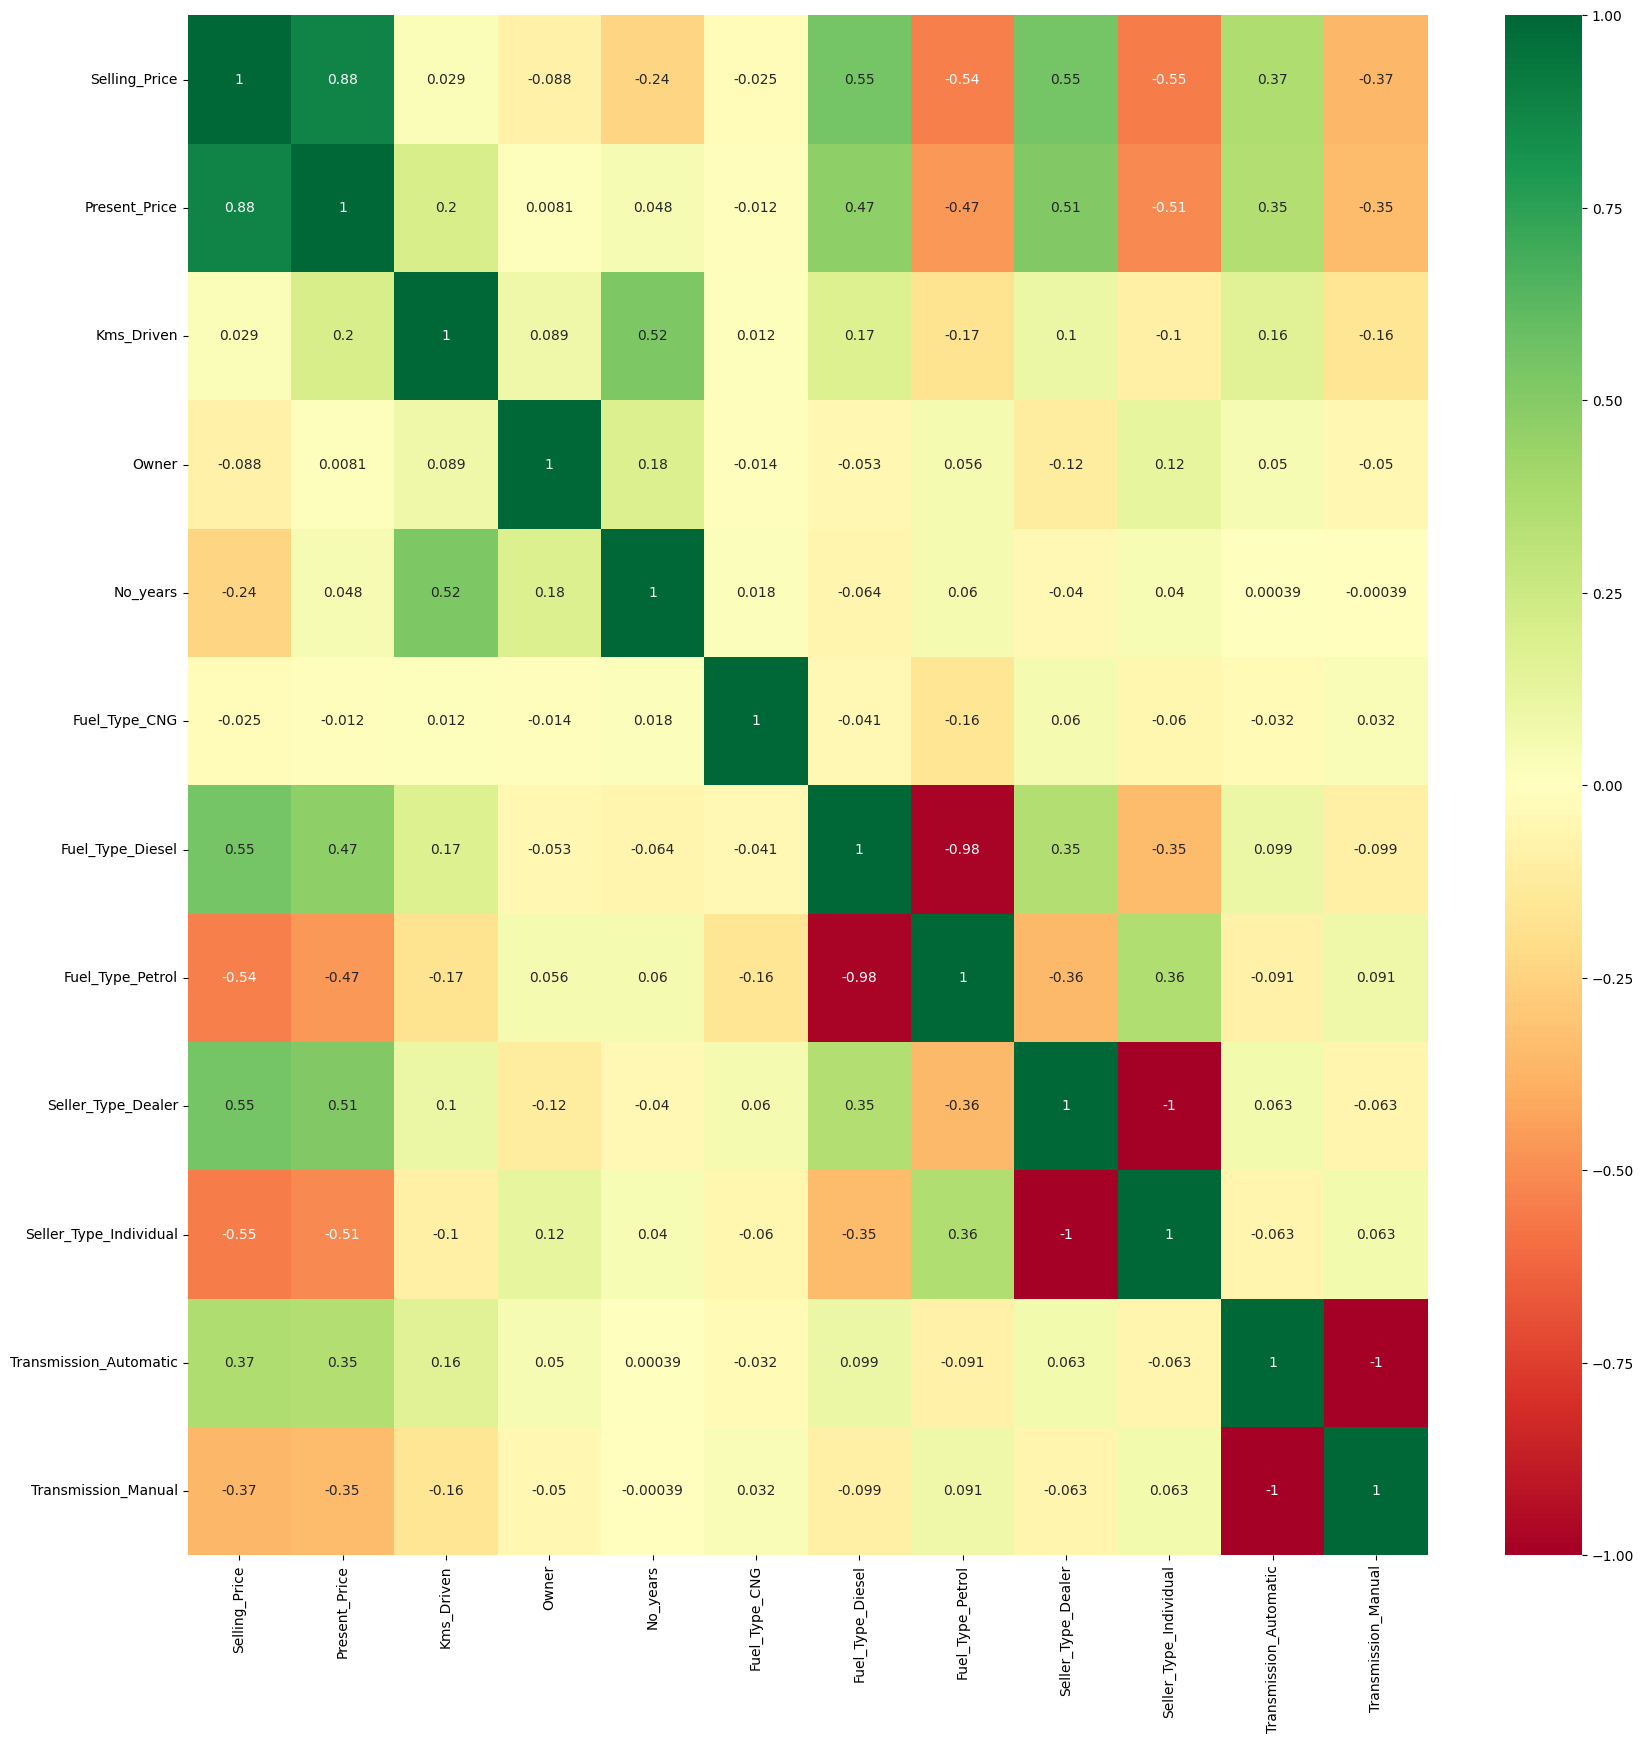

In [ ]:
corrmat = car_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(car_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [ ]:
y = car_df['Selling_Price']
X = car_df.drop('Selling_Price', axis=1)

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5590,27000,0,10,0,0,1,1,0,0,1
1,9540,43000,0,11,0,1,0,1,0,0,1
2,9850,6900,0,7,0,0,1,1,0,0,1
3,4150,5200,0,13,0,0,1,1,0,0,1
4,6870,42450,0,10,0,1,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Present_Price', 'Kms_Driven', 'No_years']

scaler = MinMaxScaler()

X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
X.head()

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.057109,0.053053,0,0.266667,0,0,1,1,0,0,1
1,0.099913,0.085085,0,0.333333,0,1,0,1,0,0,1
2,0.103273,0.012813,0,0.066667,0,0,1,1,0,0,1
3,0.041504,0.009409,0,0.466667,0,0,1,1,0,0,1
4,0.070980,0.083984,0,0.266667,0,1,0,1,0,0,1


Con esto terminamos la parte de preprocesamiento y podemos proceder a entrenar a nuestro modelo de regresión.

### **ENTRENAMIENTO**

Dividimos nuestro set de datos e imprimimos la forma de nuestros datos de entrenamiento y de prueba.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((225, 11), (225,))
Prueba: ((76, 11), (76,))


Comenzaremos entrenando nuestro modelo con Regresión Lineal.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Imprimimos el score de nuestro modelo.

In [ ]:
lr.score(X_train,y_train)

0.8748249641035807

In [ ]:
y_pred_test = lr.predict(X_test)

Tomamos como ejemplo 5 valores de prueba y los valores que predijo nuestro modelo para compararlos.

In [ ]:
import numpy as np
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
297    4000
191     200
33     6000
107    1250
150     500
Name: Selling_Price, dtype: int64
Valores predichos:
[4364.88 -731.02 7487.78  670.83 -271.  ]


Creamos una gráfica para visualizar nuestros valores reales y los predichos por nuestro modelo.

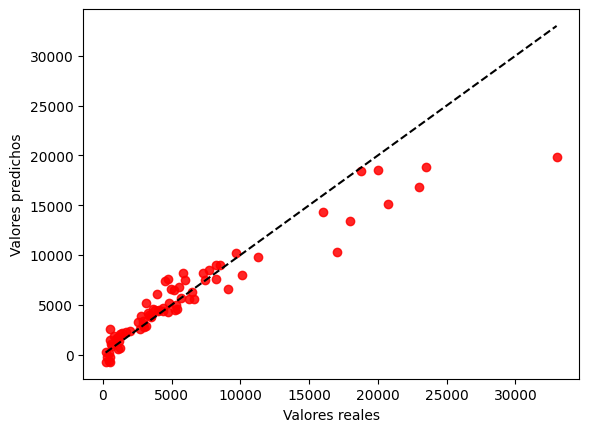

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
# plt.plot(y_tr, y_predict_train_lr, 'bx')
# plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

In [ ]:
y_pred_train = lr.predict(X_train)

Ahora tomamos como prueba valores de nuestro set de entrenamiento para compararlos con los valores que nuestro modelo predijo.

In [ ]:
print(f"Valores de prueba:\n{y_train[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_train[:5],2)}")

Valores de prueba:
283     8990
275    10900
233     3900
69     14250
134      650
Name: Selling_Price, dtype: int64
Valores predichos:
[ 7241.86  8691.8   5430.45 10807.03  1838.97]


Nuevamente graficamos para realizar una comparativa entre los valores reales, los predichos en el set de entrenamiento y en el de test.

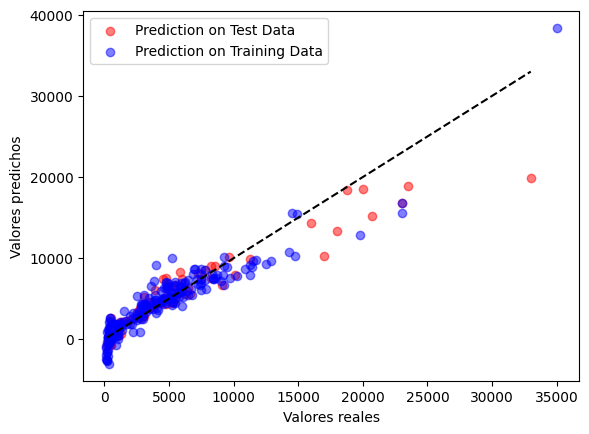

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.5)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.5)
plt.plot(xaxis,xaxis,'k--')
plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

Finalmente imprimimos nuestro score en ambos conjunto de datos.

In [ ]:
print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.8748249641035807
Prueba: 0.8658500837350891


Relizamos una búsqueda del mejor modelo con los mejores hiperparámetros para ajustarlo a nuestro modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Definir los hiperparámetros a ajustar para cada modelo
parameters = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'Support Vector Machine': {'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto']}
}

# Definir la métrica de evaluación
scoring = 'neg_mean_squared_error'

# Realizar la búsqueda en cuadrícula para cada modelo
for model_name, model in models.items():
    print(f"Evaluando {model_name}...")
    grid_search = GridSearchCV(model, parameters[model_name], scoring=scoring, cv=5)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor estimador
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Evaluar el modelo en el conjunto de prueba
    y_pred = best_estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Imprimir resultados
    print(f"Mejores parámetros: {best_params}")
    print(f"Error cuadrático medio en conjunto de prueba: {mse}")
    print("-----------------------------------------------------")


Evaluando Linear Regression...
Mejores parámetros: {}
Error cuadrático medio en conjunto de prueba: 5449358.811377677
-----------------------------------------------------
Evaluando Ridge...
Mejores parámetros: {'alpha': 0.1}
Error cuadrático medio en conjunto de prueba: 6060527.342834523
-----------------------------------------------------
Evaluando Lasso...
Mejores parámetros: {'alpha': 10.0}
Error cuadrático medio en conjunto de prueba: 6043490.511165375
-----------------------------------------------------
Evaluando Random Forest...
Mejores parámetros: {'max_depth': 20, 'n_estimators': 100}
Error cuadrático medio en conjunto de prueba: 2572123.016973684
-----------------------------------------------------
Evaluando Gradient Boosting...
Mejores parámetros: {'learning_rate': 0.5, 'n_estimators': 200}
Error cuadrático medio en conjunto de prueba: 1747031.8013375981
-----------------------------------------------------
Evaluando Support Vector Machine...
Mejores parámetros: {'C': 10.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Crear una instancia del modelo de Gradient Boosting con los mejores parámetros
best_gb_model = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100)

# Entrenar el modelo con los datos de entrenamiento
best_gb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_gb_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)

# Imprimir el error cuadrático medio
print(f"Error cuadrático medio en conjunto de prueba: {mse}")


Error cuadrático medio en conjunto de prueba: 1836074.650613742


In [ ]:
# Calcular la puntuación (score) del mejor modelo en el conjunto de prueba
score = best_gb_model.score(X_test, y_test)

# Imprimir la puntuación del mejor modelo
print(f"Puntuación del mejor modelo: {score}")


Puntuación del mejor modelo: 0.9548003225403892


In [ ]:
from sklearn.metrics import r2_score

# Obtener la puntuación (score) del modelo en el conjunto de entrenamiento
train_score = best_gb_model.score(X_train, y_train)

# Obtener la puntuación (score) del modelo en el conjunto de prueba
test_score = best_gb_model.score(X_test, y_test)

# Imprimir las puntuaciones
print(f"Puntuación en conjunto de entrenamiento: {train_score}")
print(f"Puntuación en conjunto de prueba: {test_score}")



Puntuación en conjunto de entrenamiento: 0.9998333235678152
Puntuación en conjunto de prueba: 0.9548003225403892


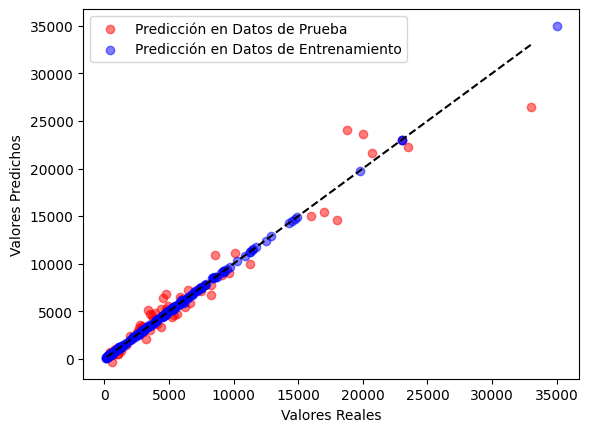

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hacer predicciones con el mejor modelo en los conjuntos de entrenamiento y prueba
y_pred_train = best_gb_model.predict(X_train)
y_pred_test = best_gb_model.predict(X_test)

# Crear un rango de valores para el eje x
xaxis = np.linspace(np.min(y_test), np.max(y_test), 100)

# Crear el gráfico
plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red', alpha=0.5)
plt.scatter(y_train, y_pred_train, c='blue', alpha=0.5)
plt.plot(xaxis, xaxis, 'k--')
plt.legend(['Predicción en Datos de Prueba', 'Predicción en Datos de Entrenamiento'])
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.show()


# **CLASIFICACIÓN 1:**

---


Para este proyecto, realizaremos un modelo de clasificación con el objetivo de predecir si un pasajero del famoso viaje en Titanic sobrevivió o no en base a ciertas características dadas. Nos apoyaremos nuevamente de la página kaggle.com y usaremos el dataset de nombre "Titanic - Machine Learning from Disaster". Comencemos importando las librerías que usaremos y preprocesando nuestros datos para que estén listos para entrenar nuestro modelo.

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestro conjunto de datos y separamos los datos en características y etiquetas (X y Y)

In [ ]:
titanic = pd.read_csv('train.csv')
Y_titanic = titanic['Survived']
X_titanic = titanic.drop('Survived', axis=1)

Visualizamos la estructura de nuestros datos.

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos notar que en las columnas Age, Cabin y Embarked tenemos datos faltantes.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Veamos como se ven nuestro conjunto de datos X.

In [ ]:
X_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **PREPROCESAMIENTO:**

Graficamos las columnas de nuestro conjunto de datos para ver de que manera están distribuidos.

Esta columna representa nuestros datos a predecir o nuestras etiquetas, es decir, nuestro conjunto Y.

<ipython-input-100-e79db7d6b7ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic, palette='Set1')


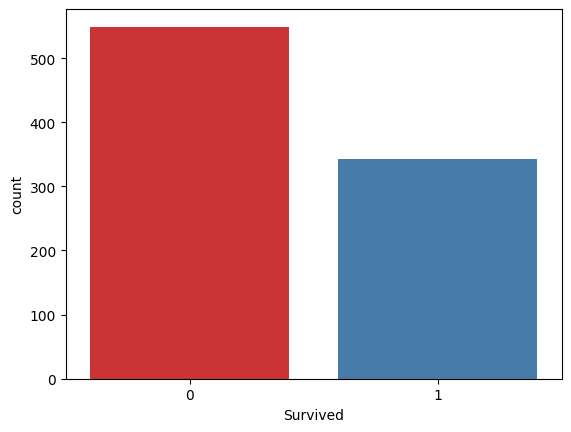

In [ ]:
sns.countplot(x='Survived', data=titanic, palette='Set1')
plt.show()

Esta columna hace referencia a la clase en donde se alojaba el pasajero en cuestión. Hay algunos modelos que no trabajan correctamente con variables ordinales, y haremos uso de algunos de ellos por lo que hay necesidad de preprocesar con One-Hot Encoding.

<ipython-input-101-6d58acd79864>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic, palette='Set1')


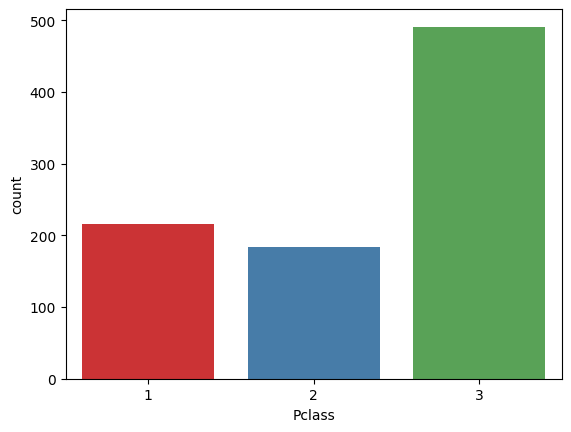

In [ ]:
sns.countplot(x='Pclass', data=titanic, palette='Set1')
plt.show()

Usaremos Label-Encoding en esta columna al existir únicamente 2 categorías.

<ipython-input-102-d3281b28fedc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic, palette='Set1')


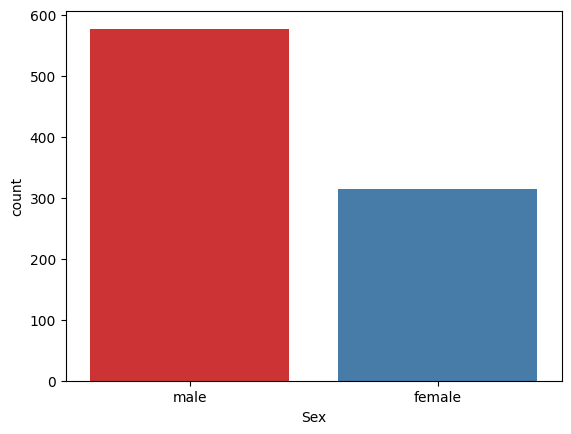

In [ ]:
sns.countplot(x='Sex', data=titanic, palette='Set1')
plt.show()

La columna SibSp en el conjunto de datos del Titanic representa el número de hermanos/esposas a bordo del Titanic para un pasajero. Dado la distribución de datos en las categorías, agruparemos las categorías mayores o iguales a 2 en una sola.

<ipython-input-103-67b73b9a4e3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=titanic, palette='Set1')


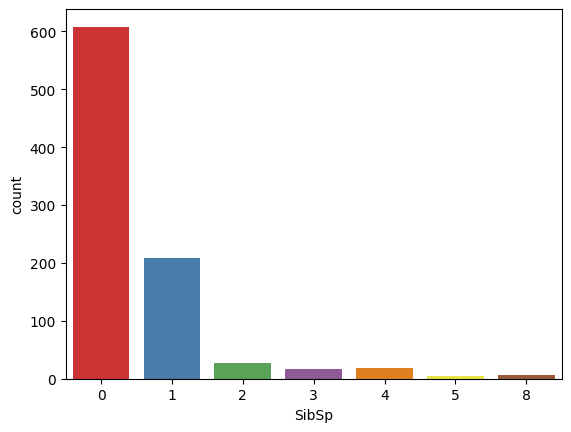

In [ ]:
sns.countplot(x='SibSp', data=titanic, palette='Set1')
plt.show()

Agrupamos los datos '2 o más' en un solo conjunto.

In [ ]:
X_titanic['SibSp'] = X_titanic['SibSp'].apply(lambda x: x if x < 2 else 2)

Graficamos nuevamente nuestra columna para verificar que la distribución haya cambiado correctamente.

<ipython-input-105-52b4f910c6b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=X_titanic, palette='Set1')


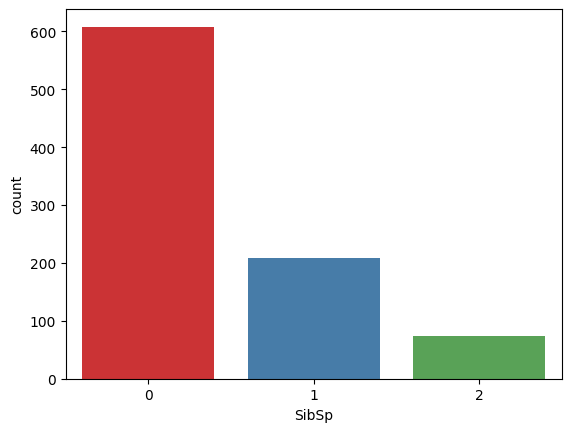

In [ ]:
sns.countplot(x='SibSp', data=X_titanic, palette='Set1')
plt.show()

La columna Parch en el conjunto de datos del Titanic representa el número de padres/hijos a bordo del Titanic para un pasajero. Dado la distribución de datos en las categorías, agruparemos las categorías mayores o iguales a 3 en una sola.

<ipython-input-106-46c7c9b743bd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=titanic, palette='Set1')


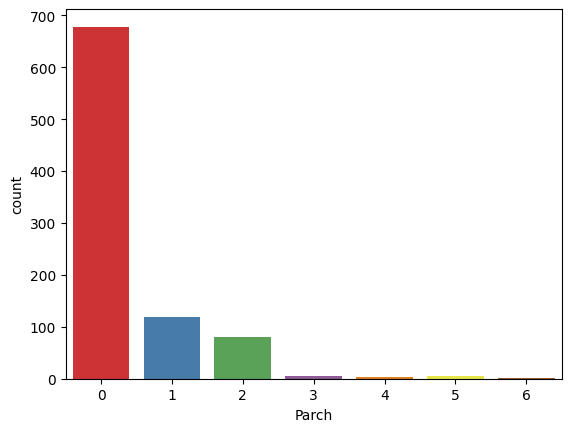

In [ ]:
sns.countplot(x='Parch', data=titanic, palette='Set1')
plt.show()

In [ ]:
X_titanic['Parch'] = X_titanic['Parch'].apply(lambda x: x if x < 3 else 3)

Graficamos nuevamente para verificar que la distribución se haya aplicado correctamente.

<ipython-input-108-06dbe89833d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=X_titanic, palette='Set1')


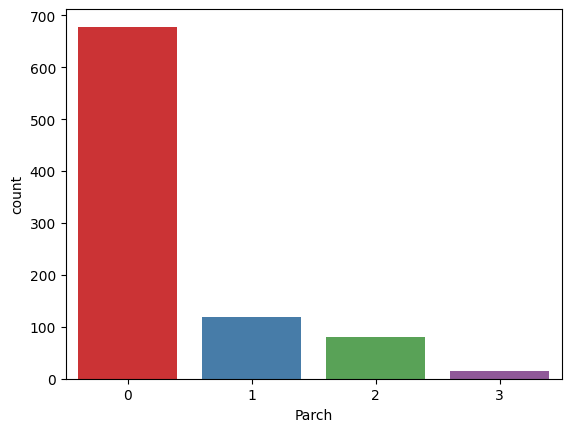

In [ ]:
sns.countplot(x='Parch', data=X_titanic, palette='Set1')
plt.show()

<ipython-input-109-ef0458222def>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic, palette='Set1')


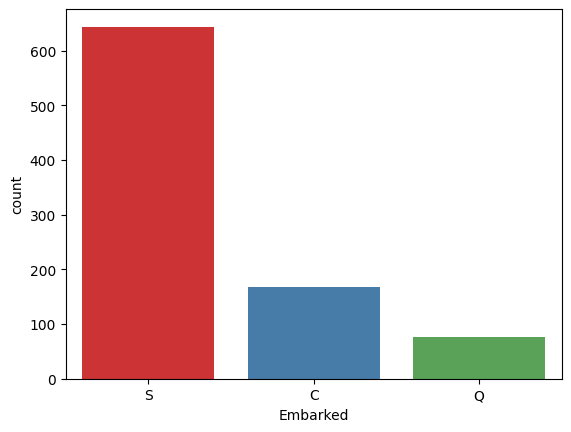

In [ ]:
sns.countplot(x='Embarked', data=titanic, palette='Set1')
plt.show()

<ipython-input-110-0c31bc422368>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

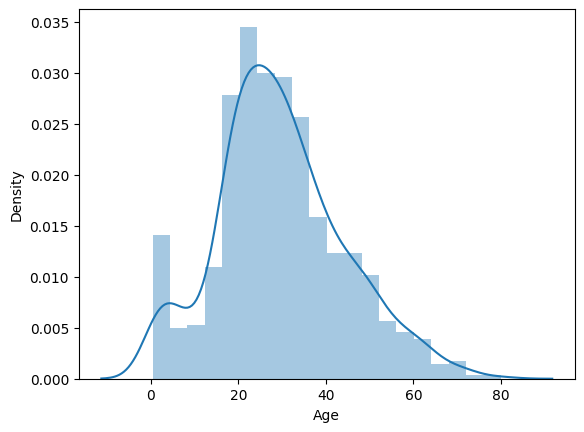

In [ ]:
sns.distplot(titanic['Age'])

<ipython-input-111-ef47cc1d79b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

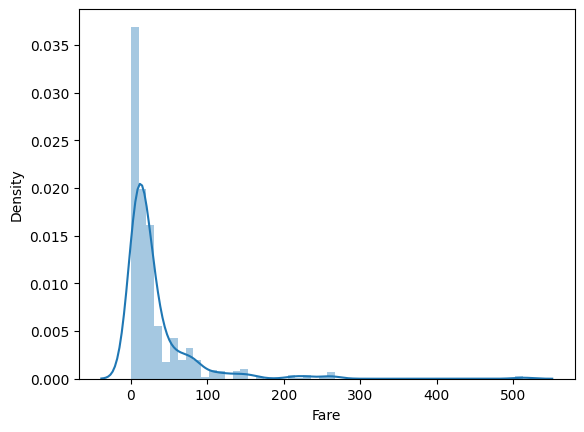

In [ ]:
sns.distplot(titanic['Fare'])

Comenzamos quitando las columnas Name, PassengerID y Ticket puesto que no nos ofrecen información relevenante.

In [ ]:
X_titanic = X_titanic.drop('Name', axis=1)
X_titanic = X_titanic.drop('PassengerId', axis=1)
X_titanic = X_titanic.drop('Ticket', axis=1)
X_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
X_titanic.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,2.308642,NaN,29.699118,0.400673,0.362514,32.204208,NaN,NaN
std,0.836071,NaN,14.526497,0.637727,0.715721,49.693429,NaN,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


Veamos la cantidad de datos ausentes por columna.

In [ ]:
X_titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Observemos que tenemos 177 datos faltantes en Edad, 687 en Cabina y 2 en Embarcación. Optaremos por imputar datos faltantes en la columna Age y Embarked y eliminaremos la columna Cabin debido al alto numero de datos faltantes.

In [ ]:
X_titanic = X_titanic.drop('Cabin', axis=1)

In [ ]:
X_titanic['Age'] = X_titanic['Age'].fillna(X_titanic['Age'].median())
X_titanic['Embarked'] = X_titanic['Embarked'].fillna('S')

#Verificamos que ha no haya presencia de datos faltantes
X_titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Pclass','Sex']
le = LabelEncoder()
for col in cols:
  X_titanic[col] = le.fit_transform(X_titanic[col])
X_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,S
1,0,0,38.0,1,0,71.2833,C
2,2,0,26.0,0,0,7.9250,S
3,0,0,35.0,1,0,53.1000,S
4,2,1,35.0,0,0,8.0500,S


In [ ]:
X_titanic = pd.get_dummies(X_titanic, columns=['SibSp', 'Parch', 'Embarked'], prefix=['SibSp', 'Parch', 'Embarked'])

In [ ]:
X_titanic.head()

,Pclass,Sex,Age,Fare,SibSp_0,SibSp_1,SibSp_2,Parch_0,Parch_1,Parch_2,Parch_3,Embarked_C,Embarked_Q,Embarked_S
0,2,1,22.0,7.2500,False,True,False,True,False,False,False,False,False,True
1,0,0,38.0,71.2833,False,True,False,True,False,False,False,True,False,False
2,2,0,26.0,7.9250,True,False,False,True,False,False,False,False,False,True
3,0,0,35.0,53.1000,False,True,False,True,False,False,False,False,False,True
4,2,1,35.0,8.0500,True,False,False,True,False,False,False,False,False,True


Dado que la distribución de Fare puede ser sesgada hacia la derecha, aplicar una transformación logarítmica puede ayudar a normalizar la distribución.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar transformación logarítmica
X_titanic['Fare'] = np.log1p(X_titanic['Fare'])  # log1p es log(1 + x) para manejar ceros

# Estandarizar la columna Fare y Age
scaler = MinMaxScaler()
X_titanic['Fare'] = scaler.fit_transform(X_titanic[['Fare']])
X_titanic['Age'] = scaler.fit_transform(X_titanic[['Age']])

In [ ]:
X_titanic.head()

,Pclass,Sex,Age,Fare,SibSp_0,SibSp_1,SibSp_2,Parch_0,Parch_1,Parch_2,Parch_3,Embarked_C,Embarked_Q,Embarked_S
0,2,1,0.271174,0.338125,False,True,False,True,False,False,False,False,False,True
1,0,0,0.472229,0.685892,False,True,False,True,False,False,False,True,False,False
2,2,0,0.321438,0.350727,True,False,False,True,False,False,False,False,False,True
3,0,0,0.434531,0.639463,False,True,False,True,False,False,False,False,False,True
4,2,1,0.434531,0.352955,True,False,False,True,False,False,False,False,False,True


### **ENTRENAMIENTO:**

Separamos nuestro conjunto de datos en Train y Test.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_titanic, Y_titanic, test_size=0.2, random_state=2023)

print(f"X Train: {x_train.shape}")
print(f"X Test: {x_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (712, 14)
X Test: (179, 14)
Y Train: (712,)
Y Test: (179,)


Comenzaremos entrenando a nuestro modelo con SVM lineal, tomando en consideración que por default C=1.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método score de la clase SVC calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.794
Test mean accuracy: 0.771


Usemos ahora el Default:

In [ ]:
clf = SVC()
clf. fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf. score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.817
Test mean accuracy: 0.804


Usemos ahora el Polinomial:

In [ ]:
clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf. score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.83
Test mean accuracy: 0.838


Por último el RBF:

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf. score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.817
Test mean accuracy: 0.804


Intentemos usar un Grid-Search bajo el modelo SVM:

In [ ]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 0.5, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

Veamos los mejores hiperparámetros:

In [ ]:
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.8062
Best params: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir los modelos y los hiperparámetros a buscar en el Grid Search
modelos = {
    'RandomForestClassifier': {
        'modelo': RandomForestClassifier(),
        'parametros': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'modelo': SVC(),
        'parametros': {
            'C': [0.1, 1, 10, 100],
            'gamma': [0.1, 0.01, 0.001, 0.0001],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },
    'LogisticRegression': {
        'modelo': LogisticRegression(),
        'parametros': {
            'C': [0.1, 1, 10, 100]
        }
    }
}

mejor_modelo = None
mejor_puntuacion = 0

# Iterar sobre los modelos y los hiperparámetros para encontrar el mejor modelo
for nombre_modelo, config in modelos.items():
    clf = GridSearchCV(config['modelo'], config['parametros'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    puntuacion = clf.best_score_
    if puntuacion > mejor_puntuacion:
        mejor_puntuacion = puntuacion
        mejor_modelo = clf.best_estimator_
    print(f"Modelo: {nombre_modelo}, Mejor Puntuación: {puntuacion}, Mejores Parámetros: {clf.best_params_}")

# Imprimir el mejor modelo y su precisión en el conjunto de prueba
print("\nMejor Modelo:")
print(mejor_modelo)
y_pred = mejor_modelo.predict(x_test)
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el Conjunto de Prueba: {precision}")



Modelo: RandomForestClassifier, Mejor Puntuación: 0.8187727765192554, Mejores Parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Modelo: SVM, Mejor Puntuación: 0.806136117403723, Mejores Parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Modelo: LogisticRegression, Mejor Puntuación: 0.8075544174135721, Mejores Parámetros: {'C': 1}

Mejor Modelo:
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)

Precisión en el Conjunto de Prueba: 0.8379888268156425


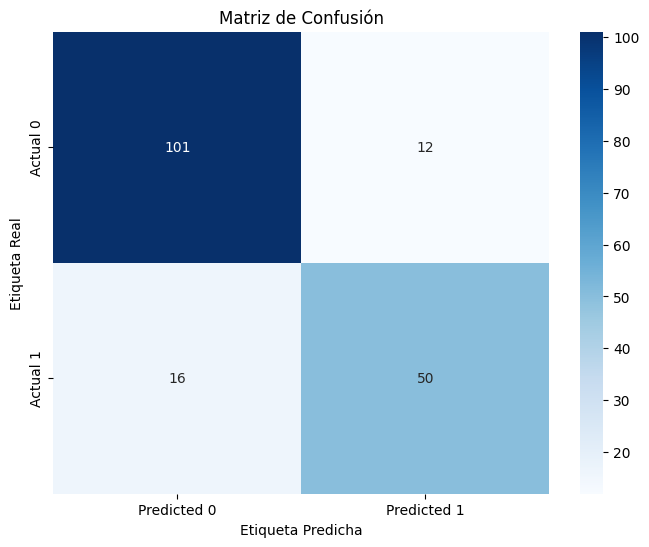

Precisión en el conjunto de prueba: 0.8435754189944135


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Utilizamos el mejor modelo RandomForestClassifier con los parámetros proporcionados
modelo = RandomForestClassifier(min_samples_split=5, n_estimators=50)

# Entrenamos nuestro modelo
modelo.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = modelo.predict(x_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la precisión en el conjunto de prueba
precision = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", precision)
